# Image Augmentation for Deep Learning With Keras

This notebook is prepeared from the blog https://machinelearningmastery.com/image-augmentation-deep-learning-keras/

Data preparation is required when working with neural network and deep learning models. Increasingly data augmentation is also required on more complex object recognition tasks.

Keras provides the `ImageDataGenerator` class that defines the configuration for image data preparation and augmentation. This includes capabilities such as:

- Sample-wise standardization.
- Feature-wise standardization.
- ZCA whitening.
- Random rotation, shifts, shear and flips.
- Dimension reordering.
- Save augmented images to disk.

In [1]:
import numpy as np

from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Point of Comparison for Image Augmentation

We will use the MNIST handwritten digit recognition task in these examples. To begin with, let's take a look at the first 12 images in the training dataset.

## Load MNIST Database

In [3]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Visualize the First 9 Training Images

In [4]:
#X_train, y_train = X_train[0:9], y_train[0:9]

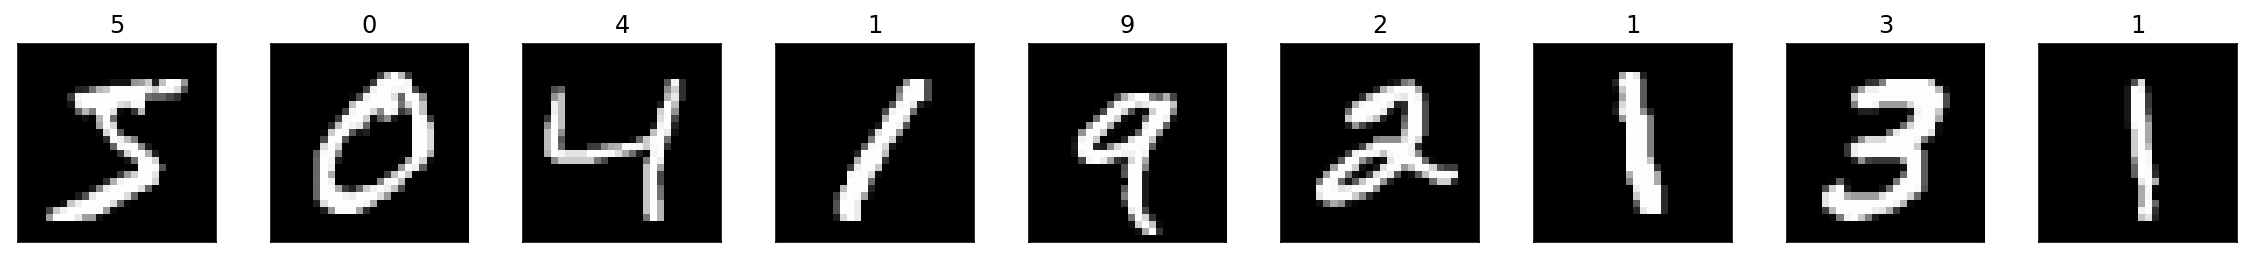

In [5]:
fig = plt.figure(figsize=(20,4))
for i in range(9):
    ax = fig.add_subplot(2, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='Greys_r')
    ax.set_title(str(y_train[i]))

In [6]:
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [7]:
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

### Feature Standardization

It is also possible to standardize pixel values across the entire dataset. This is called feature standardization and mirrors the type of standardization often performed for each column in a tabular dataset.

You can perform feature standardization by setting the `featurewise_center` and `featurewise_std_normalization` arguments on the `ImageDataGenerator` class.

In [8]:
# Standardize images across the dataset, mean=0, stdev=1
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

In [9]:
# fit parameters from data
datagen.fit(X_train)

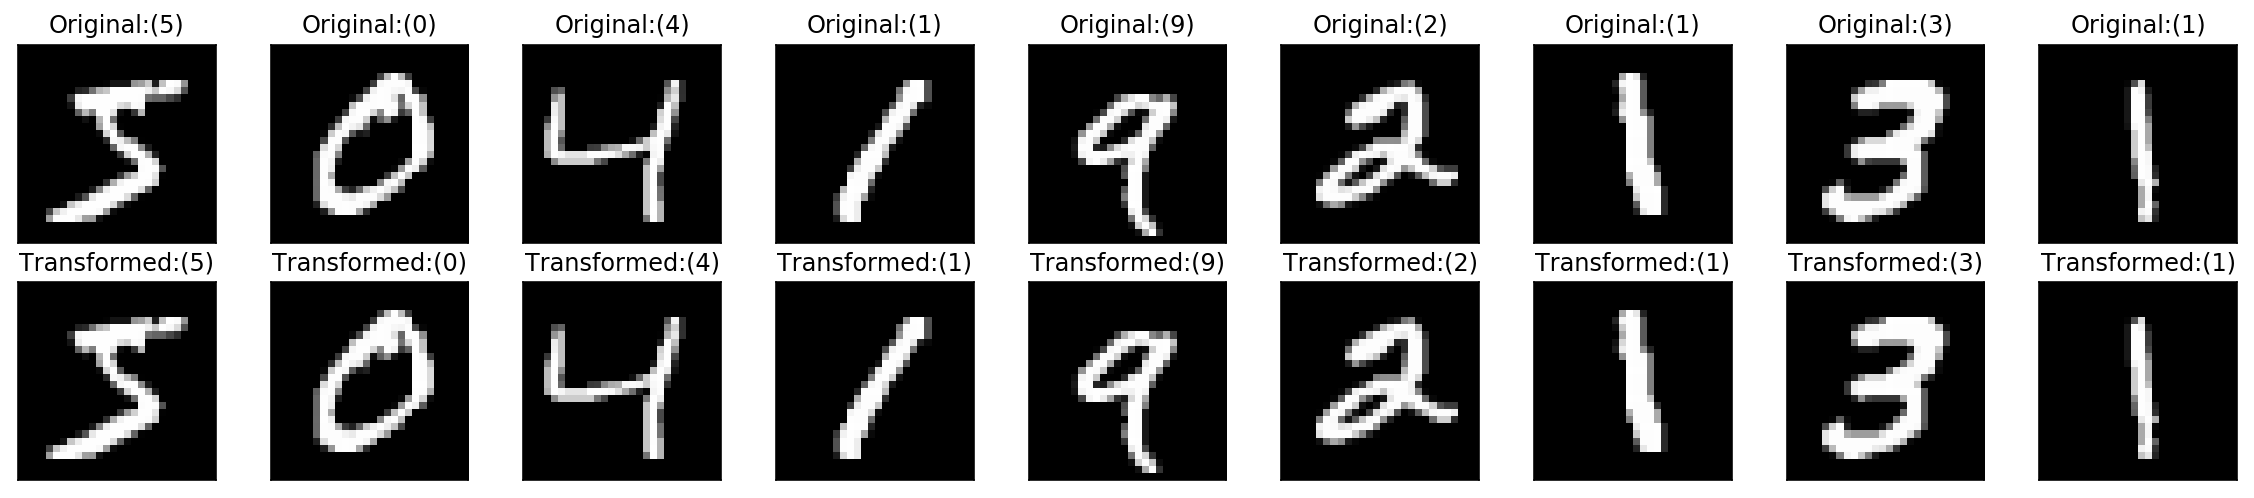

In [10]:
fig = plt.figure(figsize=(20,4))
# configure batch size and retrieve one batch of images
X_batch, y_batch = next(datagen.flow(X_train[0:9], y_train[0:9], batch_size=9, shuffle=False))    
# create a grid of 2x9 images
for i in range(9):
    ax = fig.add_subplot(2, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i].reshape(28, 28), cmap='Greys_r')
    ax.set_title('Original:({0})'.format(str(y_train[i])))
    ax = fig.add_subplot(2, 9, 9 + i + 1, xticks=[], yticks=[])
    ax.imshow(X_batch[i].reshape(28, 28), cmap='Greys_r')
    ax.set_title('Transformed:({0})'.format(str(y_batch[i])))

### ZCA Whitening

A [whitening transform](https://en.wikipedia.org/wiki/Whitening_transformation) of an image is a linear algebra operation that reduces the redundancy in the matrix of pixel images.

Less redundancy in the image is intended to better highlight the structures and features in the image to the learning algorithm.

Typically, image whitening is performed using the Principal Component Analysis (PCA) technique. More recently, an alternative called [ZCA](http://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf) shows better results and results in transformed images that keeps all of the original dimensions and unlike PCA, resulting transformed images still look like their originals.

You can perform a ZCA whitening transform by setting the `zca_whitening` argument to `True`.

In [11]:
datagen = ImageDataGenerator(zca_whitening=True)

In [12]:
# fit parameters from data
datagen.fit(X_train)

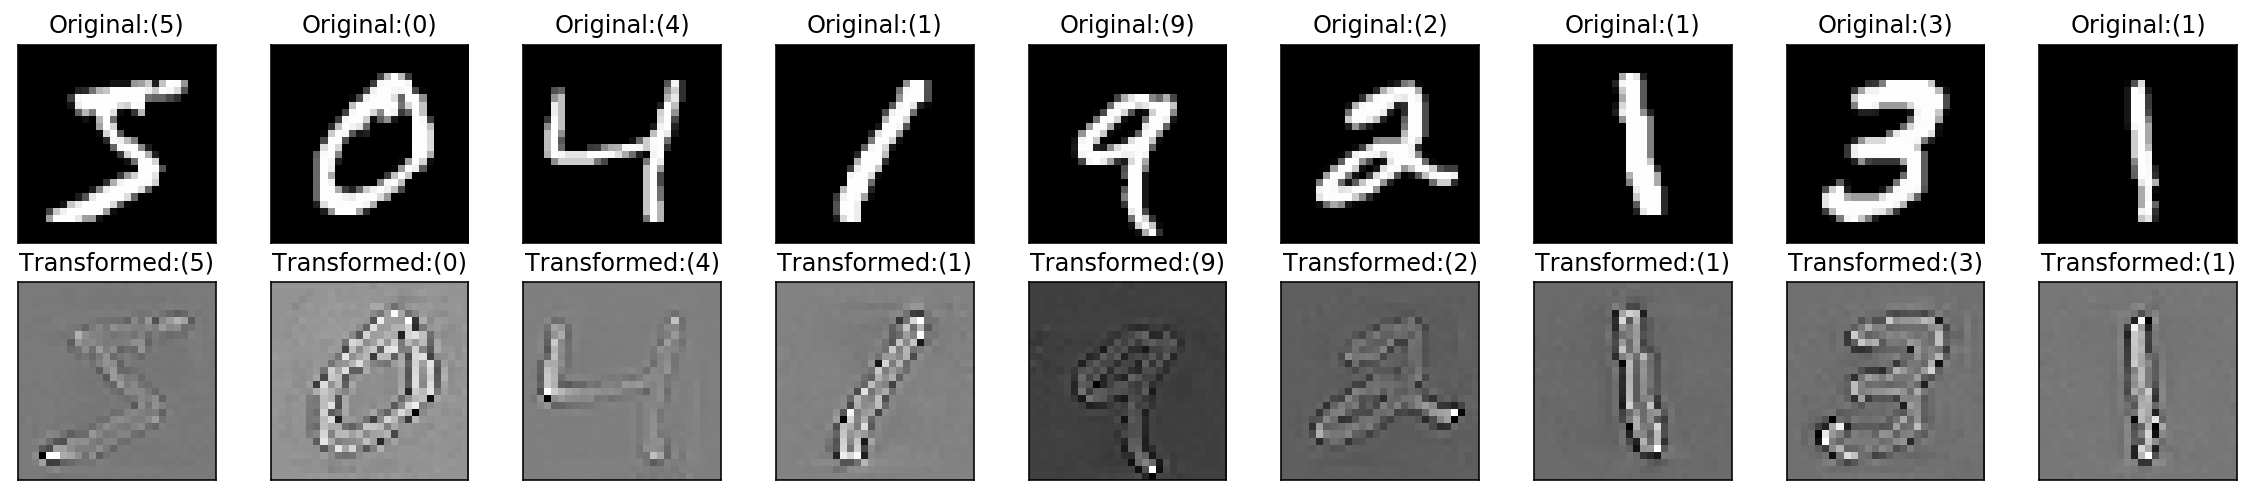

In [13]:
fig = plt.figure(figsize=(20,4))
# configure batch size and retrieve one batch of images
X_batch, y_batch = next(datagen.flow(X_train[0:9], y_train[0:9], batch_size=9, shuffle=False))    
# create a grid of 2x9 images
for i in range(9):
    ax = fig.add_subplot(2, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i].reshape(28, 28), cmap='Greys_r')
    ax.set_title('Original:({0})'.format(str(y_train[i])))
    ax = fig.add_subplot(2, 9, 9 + i + 1, xticks=[], yticks=[])
    ax.imshow(X_batch[i].reshape(28, 28), cmap='Greys_r')
    ax.set_title('Transformed:({0})'.format(str(y_batch[i])))

Running the example, you can see the same general structure in the images and how the outline of each digit has been highlighted.

### Random Rotations

Sometimes images in your sample data may have varying and different rotations in the scene.

You can train your model to better handle rotations of images by artificially and randomly rotating images from your dataset during training.

The example below creates random rotations of the MNIST digits up to 90 degrees by setting the `rotation_range` argument.

In [14]:
datagen = ImageDataGenerator(rotation_range=90)

In [15]:
# fit parameters from data
datagen.fit(X_train)

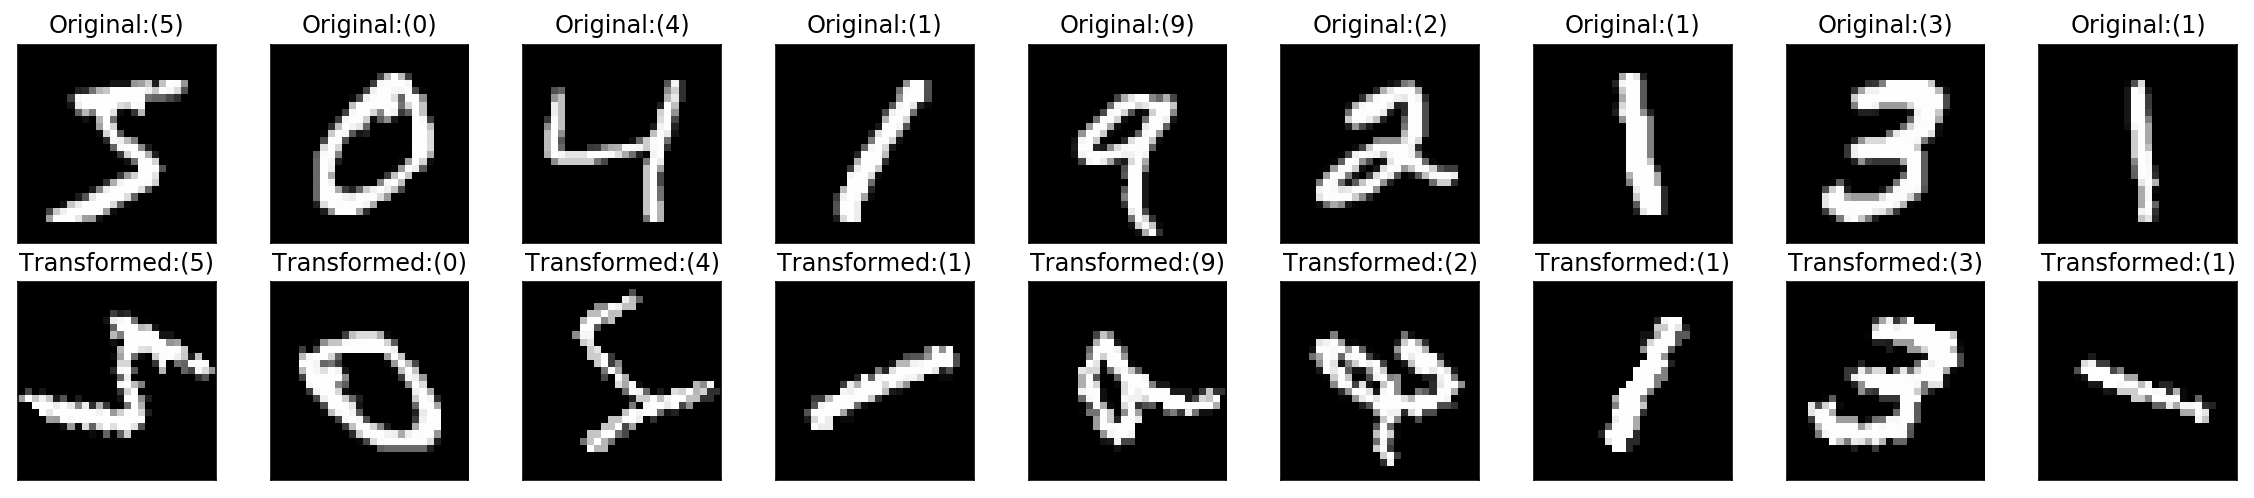

In [16]:
fig = plt.figure(figsize=(20,4))
# configure batch size and retrieve one batch of images
X_batch, y_batch = next(datagen.flow(X_train[0:9], y_train[0:9], batch_size=9, shuffle=False))    
# create a grid of 2x9 images
for i in range(9):
    ax = fig.add_subplot(2, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i].reshape(28, 28), cmap='Greys_r')
    ax.set_title('Original:({0})'.format(str(y_train[i])))
    ax = fig.add_subplot(2, 9, 9 + i + 1, xticks=[], yticks=[])
    ax.imshow(X_batch[i].reshape(28, 28), cmap='Greys_r')
    ax.set_title('Transformed:({0})'.format(str(y_batch[i])))

Running the example, you can see that images have been rotated left and right up to a limit of 90 degrees. This is not helpful on this problem because the MNIST digits have a normalized orientation, but this transform might be of help when learning from photographs where the objects may have different orientations.

### Random Shifts

Objects in your images may not be centered in the frame. They may be off-center in a variety of different ways.

You can train your deep learning network to expect and currently handle off-center objects by artificially creating shifted versions of your training data. Keras supports separate horizontal and vertical random shifting of training data by the `width_shift_range` and `height_shift_range` arguments.

In [17]:
# define data preparation
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)

In [18]:
# fit parameters from data
datagen.fit(X_train)

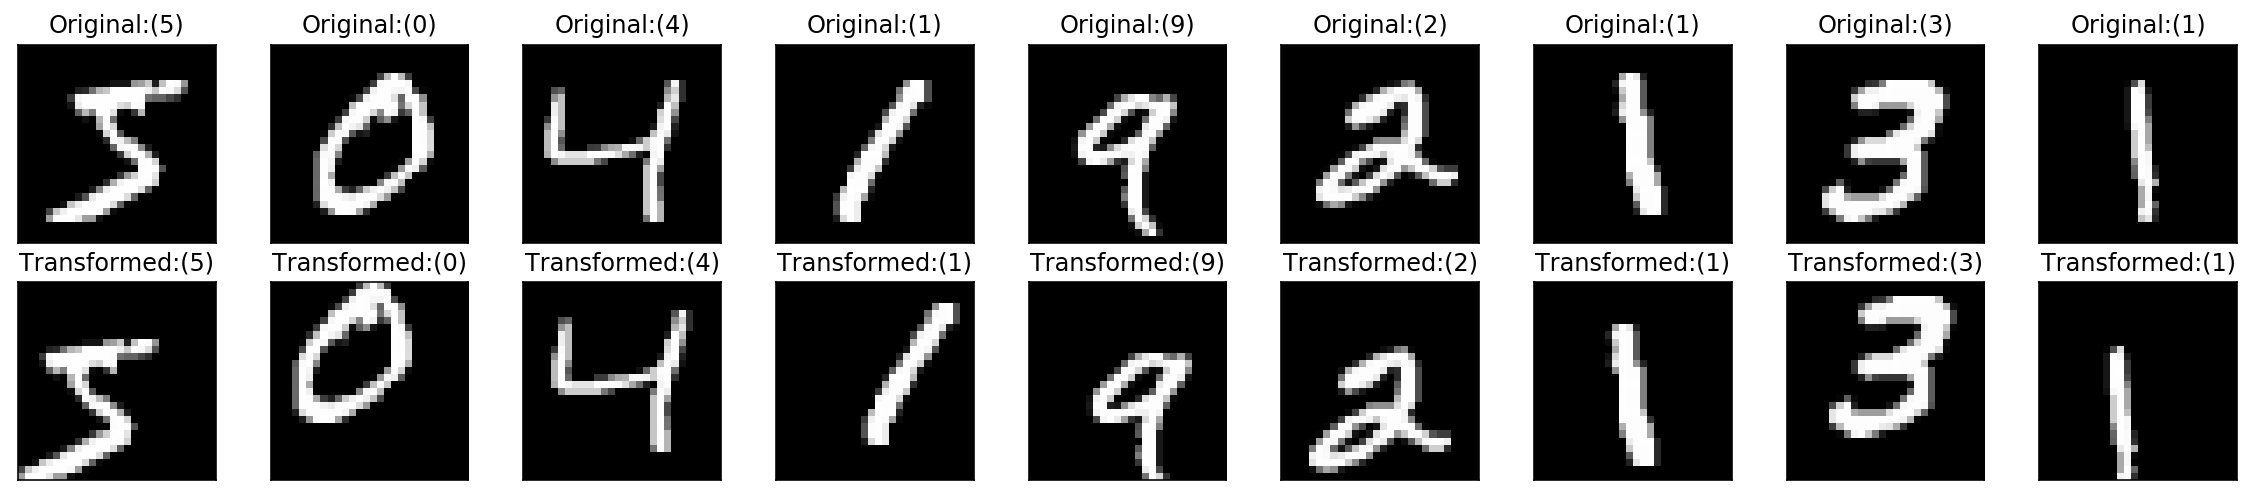

In [19]:
fig = plt.figure(figsize=(20,4))
# configure batch size and retrieve one batch of images
X_batch, y_batch = next(datagen.flow(X_train[0:9], y_train[0:9], batch_size=9, shuffle=False))    
# create a grid of 2x9 images
for i in range(9):
    ax = fig.add_subplot(2, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i].reshape(28, 28), cmap='Greys_r')
    ax.set_title('Original:({0})'.format(str(y_train[i])))
    ax = fig.add_subplot(2, 9, 9 + i + 1, xticks=[], yticks=[])
    ax.imshow(X_batch[i].reshape(28, 28), cmap='Greys_r')
    ax.set_title('Transformed:({0})'.format(str(y_batch[i])))

Running this example creates shifted versions of the digits. Again, this is not required for MNIST as the handwritten digits are already centered, but you can see how this might be useful on more complex problem domains.

### Random Flips

Another augmentation to your image data that can improve performance on large and complex problems is to create random flips of images in your training data.

Keras supports random flipping along both the vertical and horizontal axes using the `vertical_flip` and `horizontal_flip` arguments.

In [20]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

In [21]:
# fit parameters from data
datagen.fit(X_train)

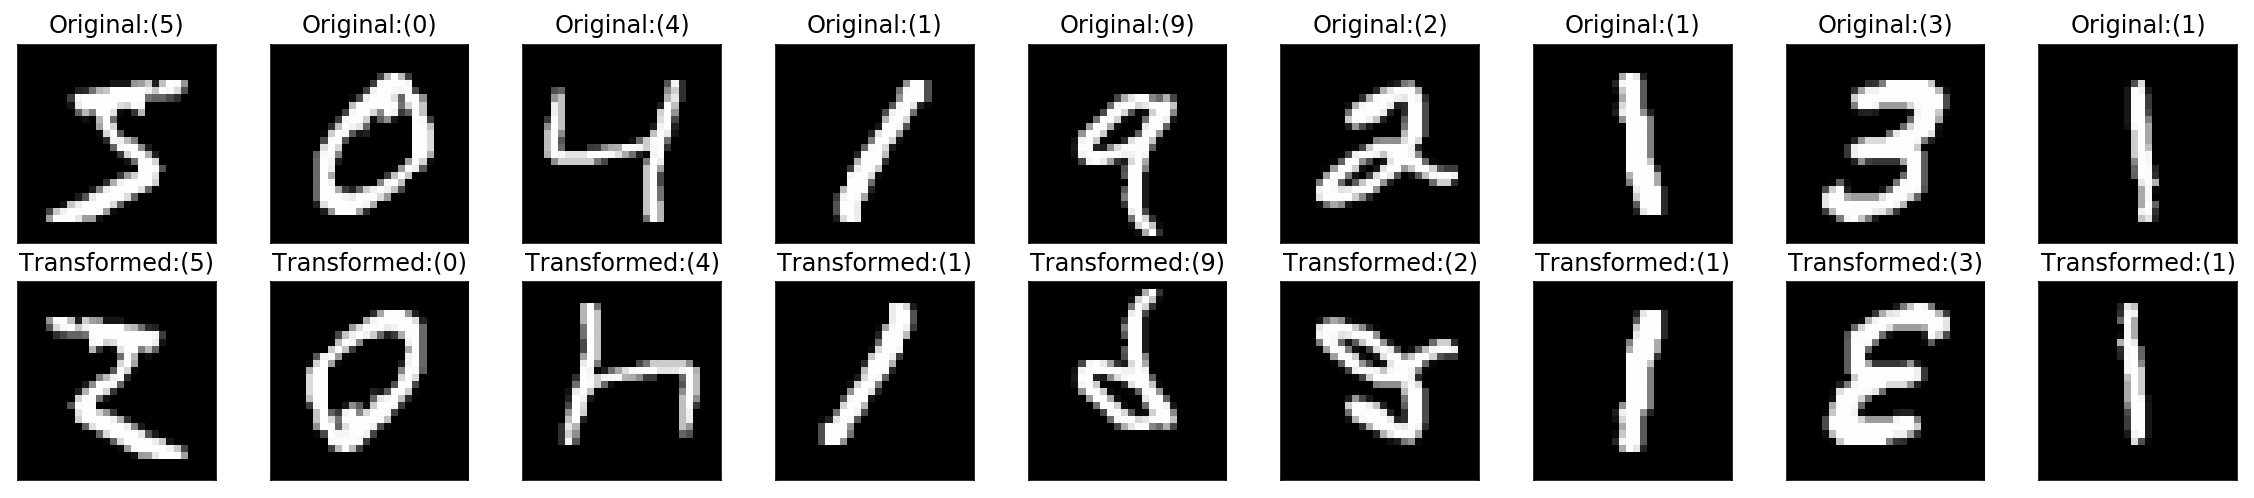

In [22]:
fig = plt.figure(figsize=(20,4))
# configure batch size and retrieve one batch of images
X_batch, y_batch = next(datagen.flow(X_train[0:9], y_train[0:9], batch_size=9, shuffle=False))    
# create a grid of 2x9 images
for i in range(9):
    ax = fig.add_subplot(2, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i].reshape(28, 28), cmap='Greys_r')
    ax.set_title('Original:({0})'.format(str(y_train[i])))
    ax = fig.add_subplot(2, 9, 9 + i + 1, xticks=[], yticks=[])
    ax.imshow(X_batch[i].reshape(28, 28), cmap='Greys_r')
    ax.set_title('Transformed:({0})'.format(str(y_batch[i])))

Running this example you can see flipped digits. Flipping digits is not useful as they will always have the correct left and right orientation, but this may be useful for problems with photographs of objects in a scene that can have a varied orientation.

### Saving Augmented Images to File

The data preparation and augmentation is performed just in time by Keras.

This is efficient in terms of memory, but you may require the exact images used during training. For example, perhaps you would like to use them with a different software package later or only generate them once and use them on multiple different deep learning models or configurations.

Keras allows you to save the images generated during training. The directory, filename prefix and image file type can be specified to the `flow()` function before training. Then, during training, the generated images will be written to file.

The example below demonstrates this and writes 12 images to a "images" subdirectory with the prefix "aug" and the file type of PNG.

In [23]:
datagen = ImageDataGenerator(zca_whitening=True)

In [24]:
# fit parameters from data
datagen.fit(X_train)

In [25]:
import shutil
shutil.rmtree('images', ignore_errors=True)

import os
os.makedirs('images')

In [26]:
# configure batch size and retrieve one batch of images
X_batch, y_batch = next(datagen.flow(X_train[0:9], y_train[0:9], batch_size=9, shuffle=False, 
                                     save_to_dir='images', save_prefix='aug', save_format='png'))

In [27]:
X_batch.shape

(9, 28, 28, 1)

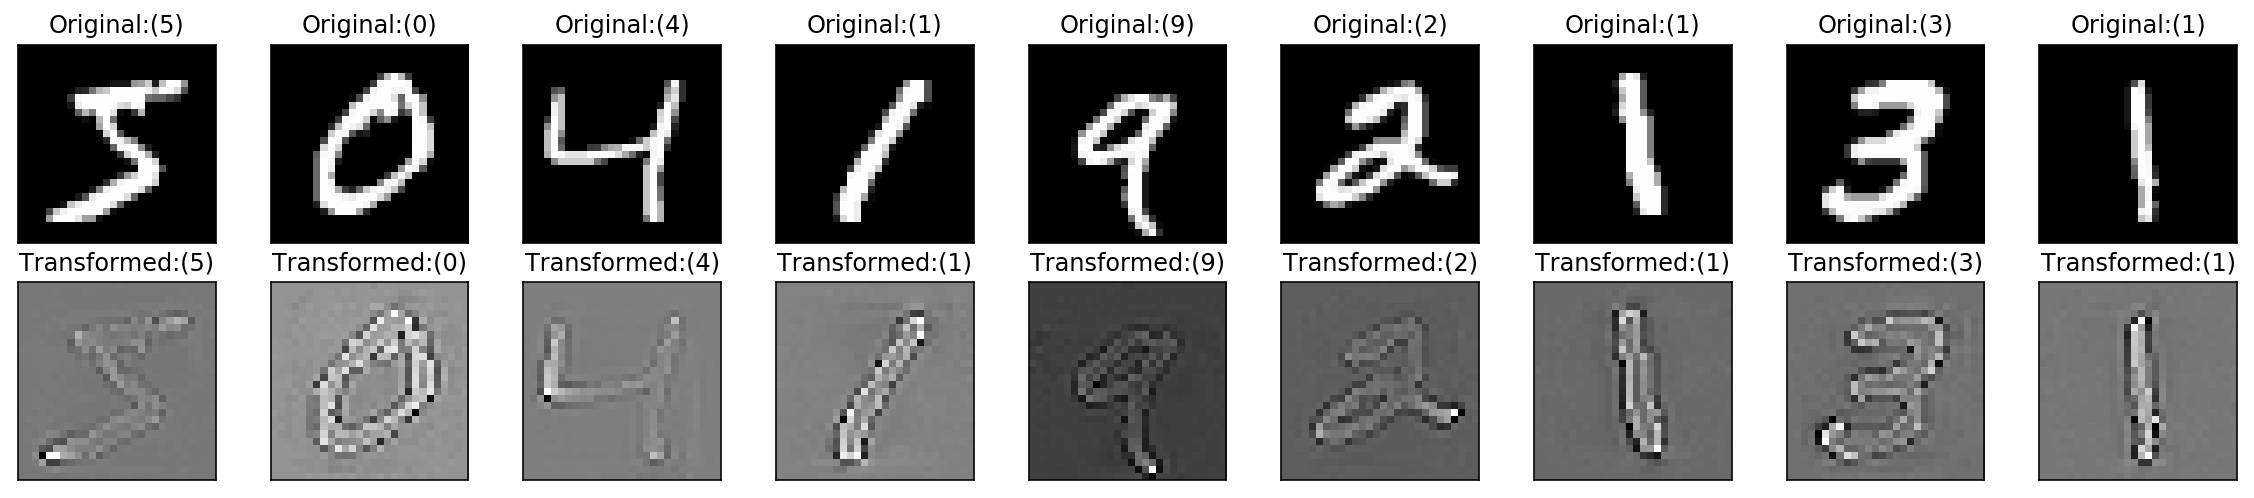

In [28]:
# load the generated augmented images from the folder
from glob import glob
g = glob('images/*.png')

from keras.preprocessing.image import array_to_img, img_to_array, load_img

fig = plt.figure(figsize=(20,4))
# create a grid of 2x9 images
for i in range(9):
    ax = fig.add_subplot(2, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i].reshape(28, 28), cmap='Greys_r')
    ax.set_title('Original:({0})'.format(str(y_train[i])))
    ax = fig.add_subplot(2, 9, 9 + i + 1, xticks=[], yticks=[])
    ax.imshow(img_to_array(load_img(g[i], grayscale=True)).reshape(28, 28), cmap='Greys_r')
    ax.set_title('Transformed:({0})'.format(str(y_batch[i])))

## Tips For Augmenting Image Data with Keras

Image data is unique in that you can review the data and transformed copies of the data and quickly get an idea of how the model may be perceive it by your model.

Below are some times for getting the most from image data preparation and augmentation for deep learning.

- **Review Dataset.** Take some time to review your dataset in great detail. Look at the images. Take note of image preparation and augmentations that might benefit the training process of your model, such as the need to handle different shifts, rotations or flips of objects in the scene.
    
- **Review Augmentations.** Review sample images after the augmentation has been performed. It is one thing to intellectually know what image transforms you are using, it is a very different thing to look at examples. Review images both with individual augmentations you are using as well as the full set of augmentations you plan to use. You may see ways to simplify or further enhance your model training process.
    
- **Evaluate a Suite of Transforms.** Try more than one image data preparation and augmentation scheme. Often you can be surprised by results of a data preparation scheme you did not think would be beneficial.